# Regression Analysis
Elements Of Data Science

In [1]:
# Import Numpy and Datascience modules.
import numpy as np
from datascience import *
import pandas as pd

# Plotting 
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', UserWarning)
import collections as collections
import collections.abc as abc
collections.Iterable = abc.Iterable

## Correlation

In [2]:
x = np.arange(1, 7, 1)
y = make_array(2, 3, 4, 5, 6, 7)
t = Table().with_columns(
        'x', x,
        'y', y
    )
t

x,y
1,2
2,3
3,4
4,5
5,6
6,7


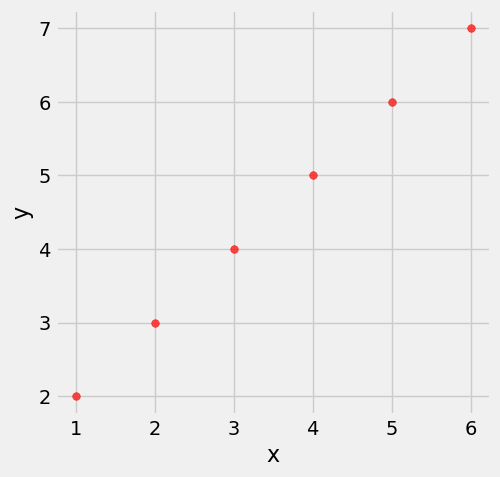

In [3]:
t.scatter(0, 1, s=30, color='red')

In [4]:
# Standardize
xz = (x - np.mean(x)) / np.std(x)
yz = (y - np.mean(y)) / np.std(y)
tz = Table().with_columns(
        'xz', xz,
        'yz', yz,
        'xz * yz', xz * yz
    )
tz

xz,yz,xz * yz
-1.46385,-1.46385,2.14286
-0.87831,-0.87831,0.771429
-0.29277,-0.29277,0.0857143
0.29277,0.29277,0.0857143
0.87831,0.87831,0.771429
1.46385,1.46385,2.14286


In [5]:
print(f"The correlation is {np.mean(tz.column('xz * yz'))}")

The correlation is 1.0


In [6]:
x = np.arange(1, 7, 1)
y = make_array(2, 3, 4, 7, 6, 7)
t = Table().with_columns(
        'x', x,
        'y', y
    )
t

x,y
1,2
2,3
3,4
4,7
5,6
6,7


In [7]:
xz = (x - np.mean(x)) / np.std(x)
yz = (y - np.mean(y)) / np.std(y)
tz = Table().with_columns(
        'xz', xz,
        'yz', yz,
        'xz * yz', xz * yz
    )
tz

xz,yz,xz * yz
-1.46385,-1.45241,2.12611
-0.87831,-0.939793,0.82543
-0.29277,-0.427179,0.125065
0.29277,1.11066,0.325169
0.87831,0.59805,0.525274
1.46385,1.11066,1.62585


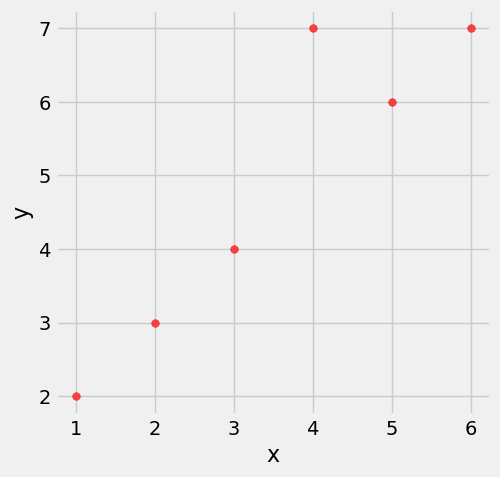

In [8]:
t.scatter(0, 1, s=30, color='red')

In [9]:
print(f"The correlation is {np.mean(tz.column('xz * yz'))}")

The correlation is 0.9254821475438169


## Old Faithful Example

In [12]:
faithful = Table.read_table("../../Lab08/faithful-new.csv")

In [13]:
faithful.show(3)

duration,wait
3.6,79
1.8,54
3.333,74


In [14]:
faithful.stats() 

statistic,duration,wait
min,1.6,43
max,5.1,96
median,4,76
sum,948.677,19284


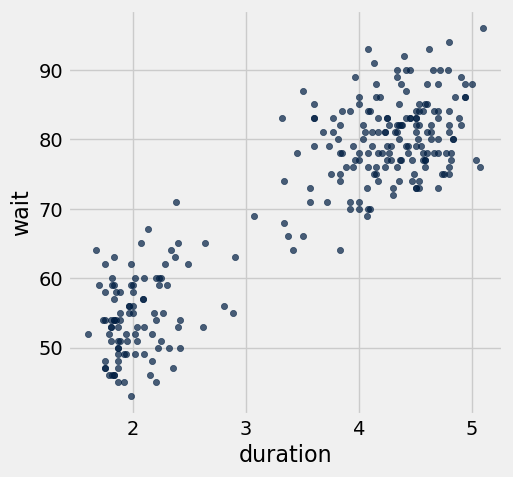

In [15]:
faithful.scatter('duration','wait')

***
Standard Units
***
$\bar{x}$=mean$(x)$<br>
<br>variance=mean$((x-\bar{x})^2)$<br>
<br>SD = $\sqrt{<(x-\bar{x})^2>}$<br>
<br>Z = ${\frac{(x-\bar{x})}{SD}}$

In [16]:
duration_mean =  np.mean(faithful["duration"])
duration_std = np.std(faithful.column("duration"))
wait_mean =  np.mean(faithful.column("wait"))
wait_std = np.std(faithful.column("wait"))

faithful_standard = Table().with_columns(
    "duration (standard units)", (faithful.column("duration") - duration_mean) / duration_std,
    "wait (standard units)", (faithful.column("wait") - wait_mean) / wait_std)
faithful_standard

duration (standard units),wait (standard units)
0.0984989,0.597123
-1.48146,-1.24518
-0.135861,0.228663
-1.0575,-0.655644
0.917443,1.03928
-0.530851,-1.17149
1.06403,1.26035
0.0984989,1.03928
-1.3498,-1.46626
0.756814,1.03928


In [17]:
np.round(np.mean(faithful_standard["duration (standard units)"]),5)

0.0

In [18]:
np.round(np.std(faithful_standard["duration (standard units)"]),5)

1.0

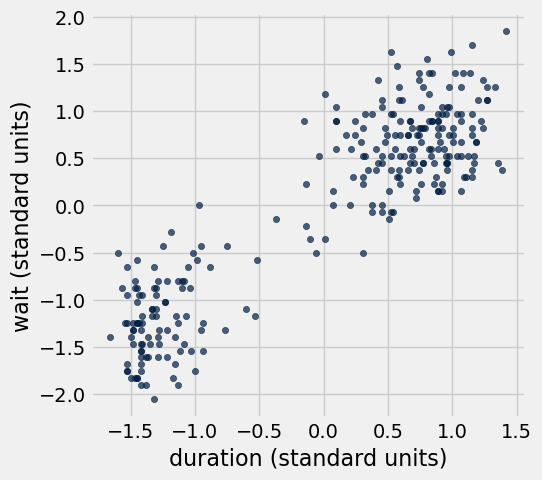

In [19]:
faithful_standard.scatter("duration (standard units)", "wait (standard units)")

In [20]:
r = np.mean(faithful_standard["duration (standard units)"]*faithful_standard["wait (standard units)"])
r 

0.90081116832181318

In [21]:
def plot_data_and_line(dataset, x, y, point_0, point_1):
    """Makes a scatter plot of the dataset, along with a line passing through two points. x and y are strings containing column labels"""
    xdata = dataset.column(x)
    ydata = dataset.column(y)
    plt.scatter(xdata, ydata, label="data")
    xs = [point_0[0], point_1[0]]
    ys = [point_0[1], point_1[1]]
    plt.plot(xs, ys, label="regression line")
    plt.legend(bbox_to_anchor=(1.5,.8))

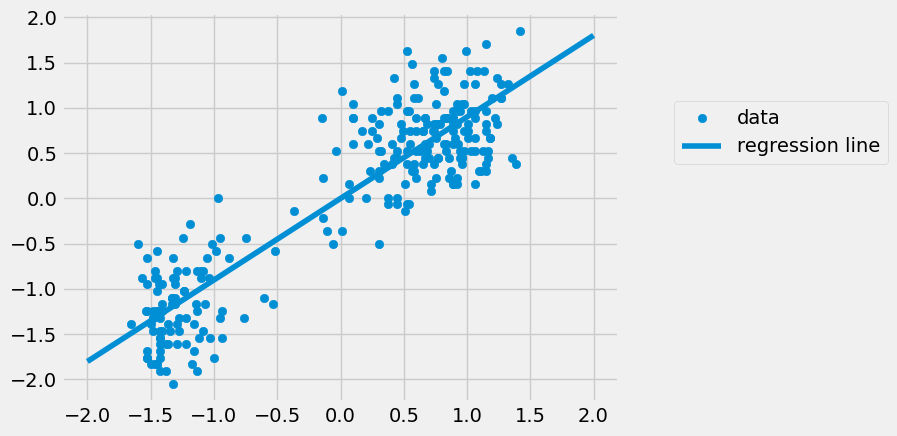

In [22]:
point_0 = [-2, -2 * r]
point_1 = [2, 2 * r]
plot_data_and_line(
    faithful_standard,
    "duration (standard units)",
    "wait (standard units)",
    point_0,
    point_1,
)

#### Slope
***

slope of the regression line $= r \cdot
\frac{SD_y}{SD_x}$<br>
intercept of the regression line $=
\bar{y} - slope \cdot \bar{x}$


## Variability of the Sample Mean

By the Central Limit Theorem, the probability distribution of the mean of a large random sample is roughly normal. The bell curve is centered at the population mean.

#### Empirical distribution of random sample means

In [23]:
def simulate_sample_mean(table, label, sample_size, repetitions):
    
    means = []

    for i in np.arange(repetitions):
        new_sample = np.random.choice(table.column(label), sample_size)
        new_sample_mean = np.mean(new_sample)
        means.append(new_sample_mean)

    sample_means = Table().with_column('Sample Means', means)
    
    # Display empirical histogram and print all relevant quantities – don't change this!
    fig, ax = plt.subplots()
    ax.hist(means, bins=20)
    plt.xlabel('Sample Means')
    plt.title('Sample Size ' + str(sample_size))
    
    textstr = '\n'.join((
    r'$\mathrm{Sample  Size}=%.2f$' % (sample_size, ),
    r'$\mathrm{Population  Mean}=%.2f$' % (np.mean(table.column(label)), ),
    r'$\mathrm{Average Of Sample Means}=%.2f$' % (np.mean(means), ), 
    r'$\mathrm{Population SD}=%.2f$' % (np.std(table.column(label)), ),
    r'$\mathrm{SD Of Sample Means}=%.2f$' % (np.std(means), )))

    # these are matplotlib.patch.Patch properties
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

    # place a text box in upper left in axes coords
    ax.text(0.95, 0.75, textstr, transform=ax.transAxes, fontsize=14,
            verticalalignment='top', bbox=props)
    
    return means

In [25]:
faithful.num_rows

272

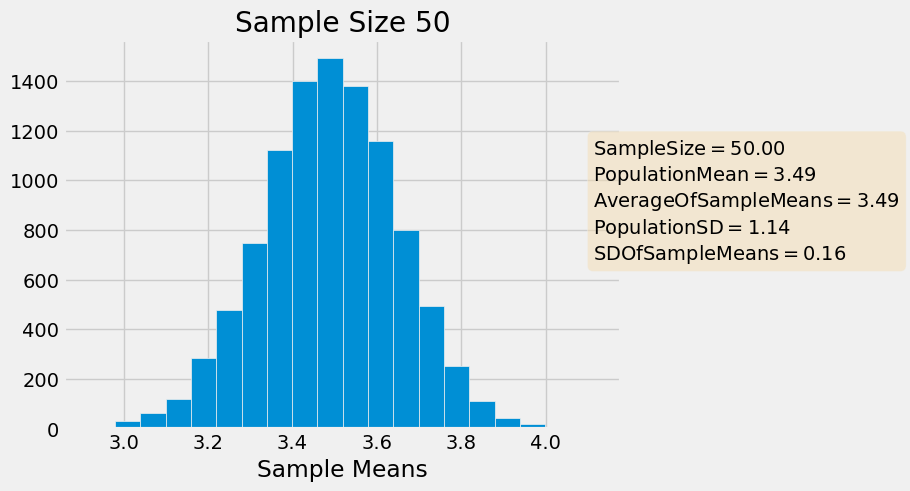

In [24]:
means = simulate_sample_mean(faithful, 'duration', 50, 10000)

## Bootstrap: [Inferential Thinking](https://inferentialthinking.com/chapters/13/2/Bootstrap.html?highlight=bootstrap#the-bootstrap)

##Correlation and regression tools

In [ ]:
def standard_units(xyz):
    "Convert any array of numbers to standard units."
    return (xyz - np.mean(xyz))/np.std(xyz)  


def correlation(t, label_x, label_y):
    return np.mean(standard_units(t.column(label_x))*standard_units(t.column(label_y)))


# Regression
def slope(t, label_x, label_y):
    r = correlation(t, label_x, label_y)
    return r*np.std(t.column(label_y))/np.std(t.column(label_x))


def intercept(t, label_x, label_y):
    return np.mean(t.column(label_y)) - slope(t, label_x, label_y)*np.mean(t.column(label_x))

## Apply tools to hybrid car data

In [ ]:
import pandas as pd
url = "hybrid_reg.csv"
hybrid_df = pd.read_csv(url)
hybrid_T = Table.from_df(hybrid_df) # Reading and converting using pandas dataframe
hybrid = Table.read_table(url)
hybrid
hybrid_T

In [ ]:
# MSRP is the manufacturer's suggested retail price. 
hybrid.scatter('accelrate', 'msrp')

In [ ]:
hybrid.scatter('mpg', 'msrp')

In [ ]:
plt.scatter(standard_units(hybrid.column('accelrate')), standard_units(hybrid.column('msrp')), label="data")

In [ ]:
def plot_data_and_regress(dataset, x, y):
    """Makes a scatter plot of the dataset, and a regression line."""
    xdata, ydata = dataset.column(x), dataset.column(y)
    plt.scatter(standard_units(xdata), standard_units(ydata), label="data in standard units")
    r = correlation(dataset,x,y)
    print("Correlation, r: ",np.round(r,6))
    slp = np.round(slope(dataset,x,y))
    print('Slope of Regression Line:    ', slp, 'y per x')
    intercp = np.round(intercept(dataset,x,y))
    print('Intercept of Regression Line:', intercp, 'y')
    xs, ys = zip([-2, -2*r], [2, 2*r])
    plt.plot(xs, ys, 'r',label="regression line")
    plt.legend(bbox_to_anchor=(1.0,.8))
    dataset.scatter(x,y, label="data in original units")
    xs, ys = zip([xdata.min(), xdata.min()*slp+intercp], [xdata.max(), xdata.max()*slp+intercp])
    plt.plot(xs, ys, 'g',label="regression line")
    plt.legend(bbox_to_anchor=(1.07,0.8))

In [ ]:
plot_data_and_regress(hybrid,'accelrate','msrp')

In [ ]:
def rmse(dataset,x,y):
    xdata, ydata = dataset.column(x), dataset.column(y)
    slp = np.round(slope(dataset,x,y))
    print('Slope of Regression Line:    ', slp, 'y per x')
    intercp = np.round(intercept(dataset,x,y))
    print('Intercept of Regression Line:', intercp, 'y')
    fitted = slp * xdata + intercp
    mse = np.mean((ydata - fitted) ** 2)
    print("Root mean squared error:", mse ** 0.5)

In [ ]:
rmse(hybrid,'accelrate','msrp')